# [CompuCell3D](http://compucell3d.org) in a Jupyter Notebook

> CompuCell3D is an open-source simulation environment for multi-cell, single-cell-based modeling of tissues, organs and organisms.

>It uses Cellular Potts Model to model cell behavior.

>This project is funded by the NIH and EPA.

>Compucell3D is led by Maciej Swat (IU), James Glazier(IU) and Roshan D'Souza (U.Wisc. Milwaukee) 

## Structure of the Simulations directory tree

* DATA_ROOT
    - ...
    - Sim2_cc3d_dd_MM_yyyy_hh_mm_ss
        * LatticeData
            - vtk_files ... **Here are the data**
        * Simulation
            - xml & python files ...
    
    
    - ...
    


### Parsing xml and python files

This is used for parameters management

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os



from IPython.display import Markdown, display

import matplotlib.pyplot as plt
from scipy.stats import linregress

from cc3d_parser import *
from plot_routines import *

%matplotlib inline

In [3]:
collected = {}

DATA_ROOT_base = '/home/guillaume/CC3DWorkspace/Sim2_ParameterScan_'
suffixes = ['{}_Ps{}'.format(a, b) for a in ['none', 'before', 'after']
#            for b in ['0.5', '0.6', '0.7', '0.8']]
            for b in ['0.7',]]


In [4]:
i = 0

In [36]:
collected_tumors = {}

for suffix in suffixes:

    DATA_ROOT = DATA_ROOT_base + suffix
    sim_name = suffix
    print("Treating  {}".format(sim_name))
    collected_tumors[suffix] = parse_data_dir(DATA_ROOT)
    
    
    # collect_tumor_data(tumors, collected)



Treating  none_Ps0.7
Treating  before_Ps0.7
Treating  after_Ps0.7


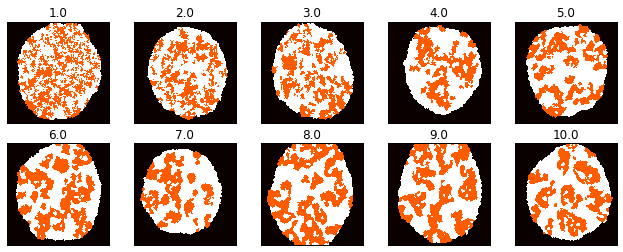

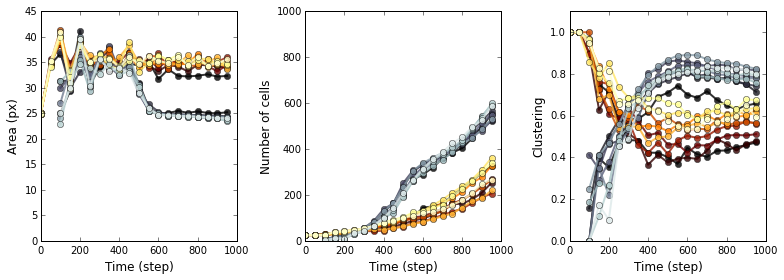

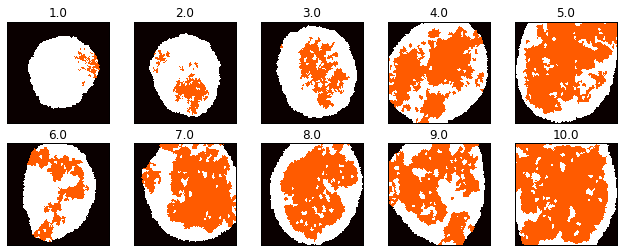

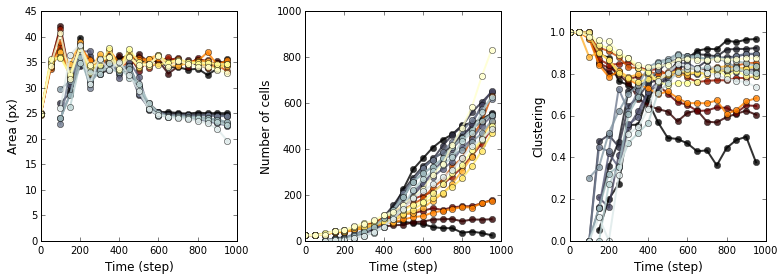

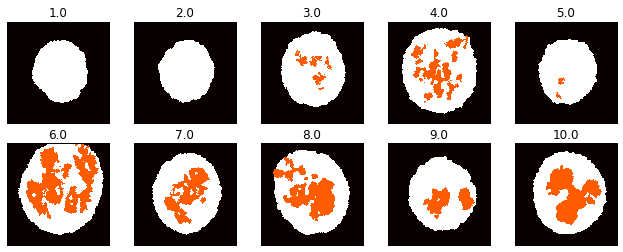

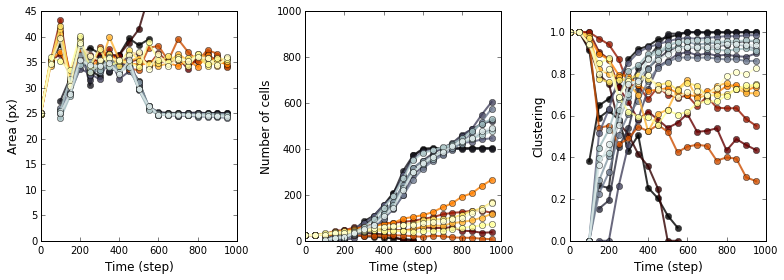

In [37]:

for suffix in suffixes:

    tumors = collected_tumors[suffix]
    frame_num = -1
    dpi = 90

    pix_width = 1024
    pix_height = 400

    f_size_i = (pix_width/dpi, pix_height/dpi)

    fig, axes = show_type(tumors, frame_num, f_size_i)

    plt.savefig('types_{}.svg'.format(sim_name))

    show_time_components(tumors, f_size_i)
    plt.savefig('evolution_{}.svg'.format(sim_name))


In [40]:
collected_data = collect_tumor_data(tumors, collected_tumors, suffixes)

In [41]:
collected_data.keys()

['before_Ps0.7', 'after_Ps0.7', 'none_Ps0.7']

In [103]:
collected

""


In [15]:
from skimage import io

In [16]:
ls ../../InVivo_data/Data_neuroblasr/


im1_cells.tif  im1_types.tif  im2_data.csv   im3_cells.tif  im3_types.tif
im1_data.csv   im2_cells.tif  im2_types.tif  im3_data.csv


In [17]:
in_vivo_path = '../../InVivo_data/Data_neuroblasr/'
segmented = io.imread(os.path.join(in_vivo_path, 'im1_cells.tif'))
types = io.imread(os.path.join(in_vivo_path, 'im1_types.tif'))
data = pd.read_csv(os.path.join(in_vivo_path, 'im1_data.csv'), sep='\t')

In [50]:
data.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            214, 215, 216, 217, 218, 219, 220, 221, 222, 223],
           dtype='int64', length=224)

In [54]:
labels = (segmented[:, :, 0]).copy().astype(np.int)

for ix, cell in data.iterrows():
    x, y = int(cell.center_x_cells), int(cell.center_y_cells)
    color = segmented[y, x]
    labels[np.product(segmented == color, axis=2)] = ix
labels = morphology.erosion(labels, morphology.square(3))    

In [55]:
rag = graph.rag_mean_color(segmented, labels)

In [56]:
rag.edges()

[(0, 64),
 (0, 187),
 (0, 53),
 (2, 112),
 (2, 81),
 (2, 180),
 (2, 86),
 (2, 212),
 (2, 252),
 (2, 191),
 (3, 192),
 (3, 64),
 (3, 198),
 (3, 135),
 (3, 40),
 (3, 170),
 (3, 203),
 (3, 14),
 (3, 16),
 (3, 18),
 (3, 118),
 (3, 55),
 (3, 152),
 (3, 58),
 (8, 129),
 (8, 86),
 (8, 139),
 (8, 148),
 (8, 26),
 (8, 27),
 (8, 157),
 (8, 44),
 (8, 45),
 (8, 176),
 (8, 50),
 (8, 184),
 (8, 61),
 (8, 64),
 (8, 66),
 (8, 214),
 (8, 220),
 (8, 96),
 (8, 226),
 (8, 105),
 (8, 119),
 (8, 252),
 (9, 40),
 (9, 105),
 (9, 226),
 (9, 86),
 (9, 49),
 (13, 225),
 (13, 17),
 (13, 33),
 (13, 70),
 (13, 113),
 (13, 139),
 (13, 44),
 (13, 81),
 (13, 179),
 (13, 22),
 (13, 185),
 (13, 132),
 (13, 36),
 (13, 223),
 (14, 64),
 (14, 37),
 (14, 200),
 (14, 170),
 (14, 140),
 (14, 205),
 (14, 104),
 (14, 86),
 (14, 250),
 (14, 150),
 (14, 133),
 (16, 197),
 (16, 203),
 (16, 53),
 (16, 55),
 (16, 152),
 (17, 67),
 (17, 197),
 (17, 230),
 (17, 139),
 (17, 140),
 (17, 203),
 (17, 22),
 (17, 250),
 (17, 126),
 (18, 49)

In [51]:
from skimage import morphology

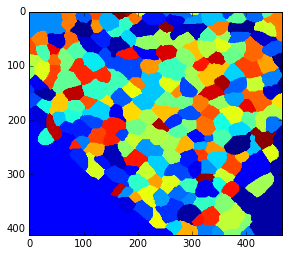

In [58]:
fig, ax = plt.subplots()
ax.imshow(labels)

In [18]:
from scipy.spatial import Delaunay

In [21]:
points = data[['center_x_cells', 'center_y_cells']]
delaunay = Delaunay(points)

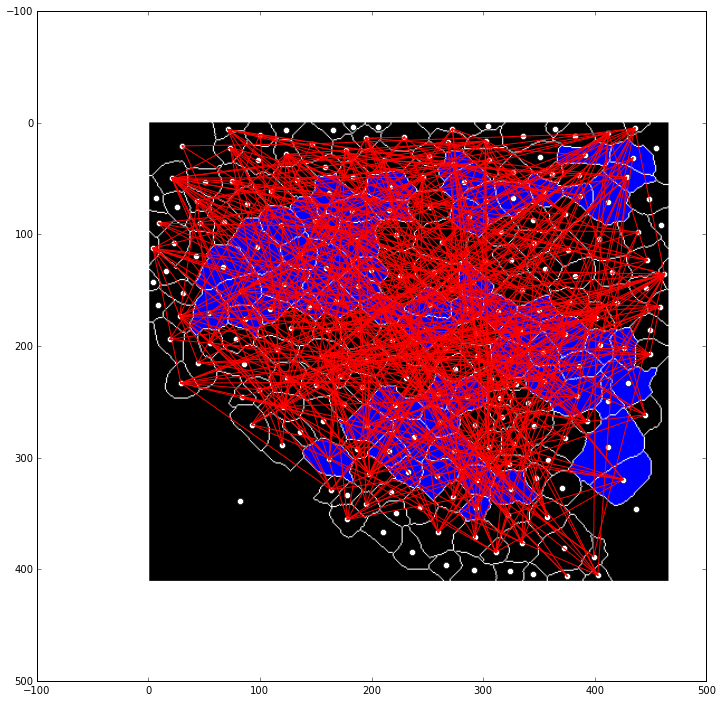

In [57]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(types)
ax.plot(data.center_x_cells, 
        data.center_y_cells, 'wo')
for srce, trgt in rag.edges_iter():
    try:
        ax.plot(data.loc[[srce, trgt], 'center_x_cells'],
                data.loc[[srce, trgt], 'center_y_cells'], 'r-')
    except:
        continue

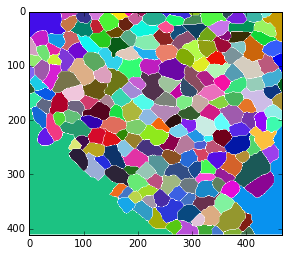

In [23]:
plt.imshow(segmented)

In [35]:
edges = []
for s in delaunay.simplices:
    edges.append([(s[0], s[1]),
                  (s[0], s[2]),
                  (s[1], s[2])])

In [25]:
types.shape, segmented.shape

((412, 467, 3), (412, 467, 3))

In [26]:
np.unique(types)

array([  0, 255], dtype=uint8)

In [27]:
types.shape

(412, 467, 3)

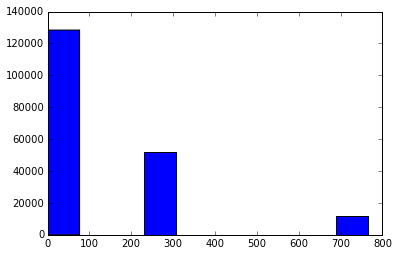

In [33]:
fig, ax =  plt.subplots()

h = ax.hist(types.sum(axis=2).ravel())

In [34]:
255*3

765

In [ ]:
segemented